# Using Convolutional Neural Networks

Welcome to the first week of the first deep learning certificate! We're going to use convolutional neural networks (CNNs) to allow our computer to see - something that is only possible thanks to deep learning.

## Introduction to this week's task: 'State_Farm_Distracted_Driver_Detection'

using data from https://www.kaggle.com/c/state-farm-distracted-driver-detection

Reusing the methods from Lesson 1 'dogs and cats'.

## Basic setup

In [1]:
#adding utility libraries
import os
import sys
import random
import time
import pip
import shutil
print ("utility libraries loaded.")

utility libraries loaded.


In [2]:
print ("sys.version_info:", sys.version_info)
installed_packages = pip.get_installed_distributions()
installed_packages_list = sorted(["%s==%s" % (i.key, i.version)
     for i in installed_packages])
#print(installed_packages_list)
#for package in installed_packages_list:
#    print (package)

('sys.version_info:', sys.version_info(major=2, minor=7, micro=12, releaselevel='final', serial=0))


In [3]:
%matplotlib inline
print ("loaded")

loaded


In [5]:
#NB: this model uses train / verify / test. we will be splitting data into these categories.
#download img.zip from https://www.kaggle.com/c/state-farm-distracted-driver-detection/data
#unzip to this directory.
#path = "/home/ubuntu/kaggle_data/"
path = "/home/ubuntu/fastai/data/state/"
print ("path:", path)
#count files in train/verify/test directories
dirList = ['train/c0/', 'train/c1/', 'train/c2/', 'train/c3/', 'train/c4/', 
           'train/c5/', 'train/c6/', 'train/c7/', 'train/c8/', 'train/c9/', 'test/']
#nb: test directory is not split into categories.
for dir_ in dirList:
    pathDir = path + dir_
    #files = [f for f in os.listdir(pathDir) if os.path.isfile(f)]
    #print("# of files in directory",pathDir," = ", files)
    numFiles = len([name for name in os.listdir(pathDir) if os.path.isfile(os.path.join(pathDir, name))])
    print pathDir, " #:", numFiles

for dir_ in dirList:
    pathDir = path + "sample/" + dir_
    #files = [f for f in os.listdir(pathDir) if os.path.isfile(f)]
    #print("# of files in directory",pathDir," = ", files)
    numFiles = len([name for name in os.listdir(pathDir) if os.path.isfile(os.path.join(pathDir, name))])
    print pathDir, " #:", numFiles
    
#drop last element from list so we can reuse this list later.
dirList = dirList[:-1]
#need to split data into train/verify for use with code below.

('path:', '/home/ubuntu/fastai/data/state/')
/home/ubuntu/fastai/data/state/train/c0/  #: 1668
/home/ubuntu/fastai/data/state/train/c1/  #: 1519
/home/ubuntu/fastai/data/state/train/c2/  #: 1553
/home/ubuntu/fastai/data/state/train/c3/  #: 1572
/home/ubuntu/fastai/data/state/train/c4/  #: 1559
/home/ubuntu/fastai/data/state/train/c5/  #: 1550
/home/ubuntu/fastai/data/state/train/c6/  #: 1558
/home/ubuntu/fastai/data/state/train/c7/  #: 1342
/home/ubuntu/fastai/data/state/train/c8/  #: 1281
/home/ubuntu/fastai/data/state/train/c9/  #: 1427
/home/ubuntu/fastai/data/state/test/  #: 79726
/home/ubuntu/fastai/data/state/sample/train/c0/  #: 166
/home/ubuntu/fastai/data/state/sample/train/c1/  #: 151
/home/ubuntu/fastai/data/state/sample/train/c2/  #: 155
/home/ubuntu/fastai/data/state/sample/train/c3/  #: 157
/home/ubuntu/fastai/data/state/sample/train/c4/  #: 155
/home/ubuntu/fastai/data/state/sample/train/c5/  #: 155
/home/ubuntu/fastai/data/state/sample/train/c6/  #: 155
/home/ubuntu/fas

In [8]:
print ("path:", path)
os.chdir(path)
print ("os.getcwd():", os.getcwd())
#create directories needed.
verifyDirList = ['valid/', 'valid/c0/', 'valid/c1/', 'valid/c2/', 'valid/c3/', 'valid/c4/', 
                 'valid/c5/', 'valid/c6/', 'valid/c7/', 'valid/c8/', 'valid/c9/']

for dir_ in verifyDirList:
    print(dir_)
    try:
        os.stat(dir_)
    except:
        print("directory",dir_,"does not exist, creating.")
        os.mkdir(dir_)
#drop first element of verifyDirList so we can re-use it below.
verifyDirList = verifyDirList[1:]
print("completed.")

('path:', '/home/ubuntu/fastai/data/state/')
('os.getcwd():', '/home/ubuntu/fastai/data/state')
valid/
valid/c0/
valid/c1/
valid/c2/
valid/c3/
valid/c4/
valid/c5/
valid/c6/
valid/c7/
valid/c8/
valid/c9/
completed.


In [9]:
#loop through dirList directories
#make list of files in directory
# select a % of files and move to directories in verifyDirList

#comment out since already run
'''
verifyFraction = 0.111   
#training/validation/test typically 80/10/10%
#we are splitting from train to verify. to achieve 80/10/10 want 1/9 split off. ie  0.111
for i in range(0,len(verifyDirList)):
    sourceDir = dirList[i]
    fileList = [name for name in os.listdir(sourceDir) if os.path.isfile(os.path.join(sourceDir, name))]
    destDir = verifyDirList[i]
    print ("moving ", int(verifyFraction*len(fileList)), " files from ", sourceDir, " to ", destDir)
    
    intToMove = random.sample(range(0, len(fileList)), int(verifyFraction * len(fileList)) )
    print ("index of files to move:", intToMove)
    for int_ in intToMove:
        #print("int_:", int_)
        src = dirList[i]       +fileList[int_]
        dst = verifyDirList[i] +fileList[int_]
        #print ("moving from ", src, " to ", dst)
        shutil.move(src, dst)
print ("completed")        
'''

'\nverifyFraction = 0.111   \n#training/validation/test typically 80/10/10%\n#we are splitting from train to verify. to achieve 80/10/10 want 1/9 split off. ie  0.111\nfor i in range(0,len(verifyDirList)):\n    sourceDir = dirList[i]\n    fileList = [name for name in os.listdir(sourceDir) if os.path.isfile(os.path.join(sourceDir, name))]\n    destDir = verifyDirList[i]\n    print ("moving ", int(verifyFraction*len(fileList)), " files from ", sourceDir, " to ", destDir)\n    \n    intToMove = random.sample(range(0, len(fileList)), int(verifyFraction * len(fileList)) )\n    print ("index of files to move:", intToMove)\n    for int_ in intToMove:\n        #print("int_:", int_)\n        src = dirList[i]       +fileList[int_]\n        dst = verifyDirList[i] +fileList[int_]\n        #print ("moving from ", src, " to ", dst)\n        shutil.move(src, dst)\nprint ("completed")        \n'

In [10]:
totalCount=0
for dir_ in verifyDirList:
    pathDir = path + dir_
    #files = [f for f in os.listdir(pathDir) if os.path.isfile(f)]
    #print("# of files in directory",pathDir," = ", files)
    numFiles = len([name for name in os.listdir(pathDir) if os.path.isfile(os.path.join(pathDir, name))])
    totalCount += numFiles
    print (pathDir, " #:", numFiles)
print ("-----------------------totalCount:", totalCount)
totalCount=0

for dir_ in dirList:
    pathDir = path + dir_
    #files = [f for f in os.listdir(pathDir) if os.path.isfile(f)]
    #print("# of files in directory",pathDir," = ", files)
    numFiles = len([name for name in os.listdir(pathDir) if os.path.isfile(os.path.join(pathDir, name))])
    totalCount += numFiles
    print (pathDir, " #:", numFiles)
print ("-----------------------totalCount:", totalCount)


('/home/ubuntu/fastai/data/state/valid/c0/', ' #:', 821)
('/home/ubuntu/fastai/data/state/valid/c1/', ' #:', 748)
('/home/ubuntu/fastai/data/state/valid/c2/', ' #:', 764)
('/home/ubuntu/fastai/data/state/valid/c3/', ' #:', 774)
('/home/ubuntu/fastai/data/state/valid/c4/', ' #:', 767)
('/home/ubuntu/fastai/data/state/valid/c5/', ' #:', 762)
('/home/ubuntu/fastai/data/state/valid/c6/', ' #:', 767)
('/home/ubuntu/fastai/data/state/valid/c7/', ' #:', 660)
('/home/ubuntu/fastai/data/state/valid/c8/', ' #:', 630)
('/home/ubuntu/fastai/data/state/valid/c9/', ' #:', 702)
('-----------------------totalCount:', 7395)
('/home/ubuntu/fastai/data/state/train/c0/', ' #:', 1668)
('/home/ubuntu/fastai/data/state/train/c1/', ' #:', 1519)
('/home/ubuntu/fastai/data/state/train/c2/', ' #:', 1553)
('/home/ubuntu/fastai/data/state/train/c3/', ' #:', 1572)
('/home/ubuntu/fastai/data/state/train/c4/', ' #:', 1559)
('/home/ubuntu/fastai/data/state/train/c5/', ' #:', 1550)
('/home/ubuntu/fastai/data/state/trai

A few basic libraries that we'll need for the initial exercises:

In [11]:
from __future__ import division,print_function

#import os, json
import json
from glob import glob
import numpy as np
np.set_printoptions(precision=4, linewidth=100)
from matplotlib import pyplot as plt
print ("loaded")

loaded


We have created a file most imaginatively called 'utils.py' to store any little convenience functions we'll want to use. We will discuss these as we use them.

In [13]:
print ("os.getcwd():", os.getcwd())
os.chdir("/home/ubuntu/fastai")
import utils; reload(utils)
from utils import plots


os.getcwd(): /home/ubuntu


WARNING (theano.sandbox.cuda): The cuda backend is deprecated and will be removed in the next release (v0.10).  Please switch to the gpuarray backend. You can get more information about how to switch at this URL:
 https://github.com/Theano/Theano/wiki/Converting-to-the-new-gpu-back-end%28gpuarray%29

Using gpu device 0: Tesla K80 (CNMeM is disabled, cuDNN 5110)
Using Theano backend.


# Use a pretrained VGG model with our **Vgg16** class

Our first step is simply to use a model that has been fully created for us, which can recognise a wide variety (1,000 categories) of images. We will use 'VGG', which won the 2014 Imagenet competition, and is a very simple model to create and understand. The VGG Imagenet team created both a larger, slower, slightly more accurate model (*VGG  19*) and a smaller, faster model (*VGG 16*). We will be using VGG 16 since the much slower performance of VGG19 is generally not worth the very minor improvement in accuracy.

We have created a python class, *Vgg16*, which makes using the VGG 16 model very straightforward. 

## The punchline: state of the art custom model in 7 lines of code

Here's everything you need to do to get >97% accuracy on the Dogs vs Cats dataset - we won't analyze how it works behind the scenes yet, since at this stage we're just going to focus on the minimum necessary to actually do useful work.

In [14]:
# As large as you can, but no larger than 64 is recommended. 
# If you have an older or cheaper GPU, you'll run out of memory, so will have to decrease this.
batch_size=64

In [15]:
# Import our class, and instantiate
import vgg16; reload(vgg16)
from vgg16 import Vgg16
print ("custom libraries loaded")

custom libraries loaded


In [16]:
path = "/home/ubuntu/fastai/data/state/sample/"
print ("path:", path)


path: /home/ubuntu/fastai/data/state/sample/


In [17]:
os.chdir(path)
print ("after resetting working directory. os.getcwd():", os.getcwd())
print ("starting")
start_time = time.time()
vgg = Vgg16()
# Grab a few images at a time for training and validation.
# NB: They must be in subdirectories named based on their category
print("getting training data")
#nb: refer above filecounts 11500+11500 = 23000
batches = vgg.get_batches(path+'train', batch_size=batch_size)
print("getting validation data")
#nb: refer above filecounts 1000+1000 = 2000
val_batches = vgg.get_batches(path+'valid', batch_size=batch_size*2)
print("vgg.finetune training data")
vgg.finetune(batches)
print ("fitting validation data")
vgg.fit(batches, val_batches, nb_epoch=1)
#this takes ~ 10 minutes on aws p2 instance.
# when sample data dir used takes ~60s  on aws p2.xlarge
print ("end")
print("--- %s seconds to run this block ---" % (time.time() - start_time))

after resetting working directory. os.getcwd(): /home/ubuntu/fastai/data/state/sample
starting
getting training data
Found 1498 images belonging to 10 classes.
getting validation data
Found 736 images belonging to 10 classes.
vgg.finetune training data
fitting validation data
Epoch 1/1
1498/1498 [==============================] - 59s - loss: 4.0831 - acc: 0.1395 - val_loss: 1.9665 - val_acc: 0.3003
end
--- 76.4328758717 seconds to run this block ---


The code above will work for any image recognition task, with any number of categories! All you have to do is to put your images into one folder per category, and run the code above.

Let's take a look at how this works, step by step...

## Use Vgg16 for basic image recognition

Let's start off by using the *Vgg16* class to recognise the main imagenet category for each image.

We won't be able to enter the Cats vs Dogs competition with an Imagenet model alone, since 'cat' and 'dog' are not categories in Imagenet - instead each individual breed is a separate category. However, we can use it to see how well it can recognise the images, which is a good first step.

First, create a Vgg16 object:

In [19]:
vgg = Vgg16()
print (type(vgg))
print ("list of available methods :", dir(vgg))


<type 'instance'>
list of available methods : ['ConvBlock', 'FCBlock', 'FILE_PATH', '__doc__', '__init__', '__module__', 'classes', 'compile', 'create', 'finetune', 'fit', 'fit_data', 'ft', 'get_batches', 'get_classes', 'model', 'predict', 'test']


Vgg16 is built on top of *Keras* (which we will be learning much more about shortly!), a flexible, easy to use deep learning library that sits on top of Theano or Tensorflow. Keras reads groups of images and labels in *batches*, using a fixed directory structure, where images from each category for training must be placed in a separate folder.

Let's grab batches of data from our training folder:

In [20]:
start_time = time.time()
batches = vgg.get_batches(path+'train', batch_size=20)

#from source code.
#test_batches = self.get_batches(path, shuffle=False, batch_size=batch_size, class_mode=None)
#        return test_batches, self.model.predict_generator(test_batches, test_batches.nb_sample)
#NB: previously we had 2 categories 'cats' and 'dogs', now we have 10 categories so selecting 2x10=20.

print("--- %s seconds to run this block ---" % (time.time() - start_time))
print (type(batches))

Found 1498 images belonging to 10 classes.
--- 0.0352349281311 seconds to run this block ---
<class 'keras.preprocessing.image.DirectoryIterator'>


(BTW, when Keras refers to 'classes', it doesn't mean python classes - but rather it refers to the categories of the labels, such as 'pug', or 'tabby'.)

*Batches* is just a regular python iterator. Each iteration returns both the images themselves, as well as the labels.

In [21]:
start_time = time.time()
imgs,labels = next(batches)
print("--- %s seconds to run this block ---" % (time.time() - start_time))
print ("imgs", type(imgs), imgs.shape)
print ("labels:", type(labels), labels.shape)
#nb: image files are 640 x 480 pixels.
#imgs = numpy.ndarray 20 of 3 colour array RGB 224x224.

--- 0.234421014786 seconds to run this block ---
imgs <type 'numpy.ndarray'> (20, 3, 224, 224)
labels: <type 'numpy.ndarray'> (20, 10)


one hot encoding

In [22]:
#summarize data to make plotting more readable.
category = []
for i in range(0,labels.shape[0]):
    #print(labels[i,:])
    index=list(labels[i,:]).index(1)
    #print("i:", i, ", index:", index)
    category.append(index)
#print ("category:", category)

category of each photo.
--- 0.672212839127 seconds to run this block ---


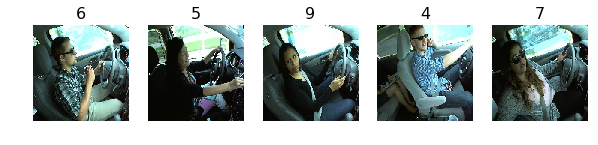

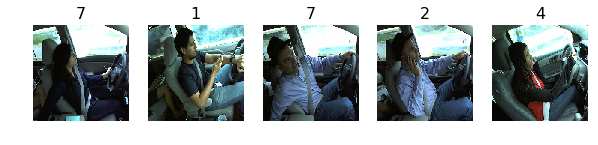

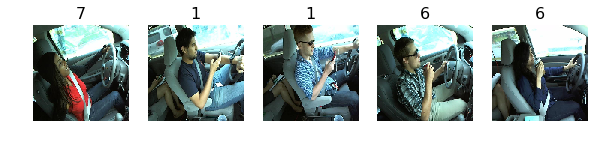

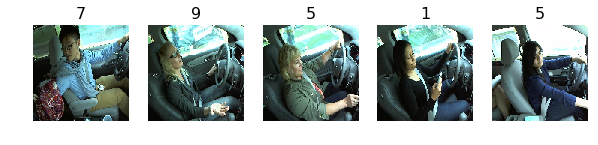

In [23]:
print("category of each photo.")
start_time = time.time()
plots(imgs[0:5],   titles=category[0:5])
plots(imgs[5:10],  titles=category[5:10])
plots(imgs[10:15], titles=category[10:15])
plots(imgs[15:20], titles=category[15:20])
#NB: utils.plots != matplotlib.plt 
print("--- %s seconds to run this block ---" % (time.time() - start_time))
#print labels to screen as titles output is messy. 
#print(labels)

We can now pass the images to Vgg16's predict() function to get back probabilities, category indexes, and category names for each image's VGG prediction.

In [24]:
start_time = time.time()
vgg.predict(imgs, True)
print("--- %s seconds to run this block ---" % (time.time() - start_time))

--- 3.76234602928 seconds to run this block ---


The category indexes are based on the ordering of categories used in the VGG model - e.g here are the first four:

In [25]:
print (type(vgg.classes))
print (len(vgg.classes))

<type 'list'>
1000


In [26]:
vgg.classes[:20]
#this list is not useful

[u'tench',
 u'goldfish',
 u'great_white_shark',
 u'tiger_shark',
 u'hammerhead',
 u'electric_ray',
 u'stingray',
 u'cock',
 u'hen',
 u'ostrich',
 u'brambling',
 u'goldfinch',
 u'house_finch',
 u'junco',
 u'indigo_bunting',
 u'robin',
 u'bulbul',
 u'jay',
 u'magpie',
 u'chickadee']

(Note that, other than creating the Vgg16 object, none of these steps are necessary to build a model; they are just showing how to use the class to view imagenet predictions.)

## Use our Vgg16 class to finetune the model

To change our model so that it outputs "cat" vs "dog", instead of one of 1,000 very specific categories, we need to use a process called "finetuning". Finetuning looks from the outside to be identical to normal machine learning training - we provide a training set with data and labels to learn from, and a validation set to test against. The model learns a set of parameters based on the data provided.

However, the difference is that we start with a model that is already trained to solve a similar problem. The idea is that many of the parameters should be very similar, or the same, between the existing model, and the model we wish to create. Therefore, we only select a subset of parameters to train, and leave the rest untouched. This happens automatically when we call *fit()* after calling *finetune()*.

We create our batches just like before, and making the validation set available as well. A 'batch' (or *mini-batch* as it is commonly known) is simply a subset of the training data - we use a subset at a time when training or predicting, in order to speed up training, and to avoid running out of memory.

In [27]:
batch_size=64

In [29]:
start_time = time.time()
batches = vgg.get_batches(path+'train/', batch_size=batch_size)
val_batches = vgg.get_batches(path+'valid/', batch_size=batch_size)
print("--- %s seconds to run this block ---" % (time.time() - start_time))

Found 1498 images belonging to 10 classes.
Found 736 images belonging to 10 classes.
--- 0.0524508953094 seconds to run this block ---


Calling *finetune()* modifies the model such that it will be trained based on the data in the batches provided - in this case, to predict one of the 10 categories.

In [30]:
start_time = time.time()
vgg.finetune(batches)
print("--- %s seconds to run this block ---" % (time.time() - start_time))

--- 0.0245640277863 seconds to run this block ---


Finally, we *fit()* the parameters of the model using the training data, reporting the accuracy on the validation set after every epoch. (An *epoch* is one full pass through the training data.)

In [31]:
#this dataset takes ~10 minutes on aws p2 instance 
start_time = time.time()
vgg.fit(batches, val_batches, nb_epoch=1)
print("--- %s seconds to run this block ---" % (time.time() - start_time))

Epoch 1/1
1498/1498 [==============================] - 57s - loss: 3.8612 - acc: 0.1449 - val_loss: 1.8402 - val_acc: 0.3383
--- 66.3218898773 seconds to run this block ---


That shows all of the steps involved in using the Vgg16 class to create an image recognition model using whatever labels you are interested in. For instance, this process could classify paintings by style, or leaves by type of disease, or satellite photos by type of crop, and so forth.

Next up, we'll dig one level deeper to see what's going on in the Vgg16 class.

# Create a VGG model from scratch in Keras

For the rest of this tutorial, we will not be using the Vgg16 class at all. Instead, we will recreate from scratch the functionality we just used. This is not necessary if all you want to do is use the existing model - but if you want to create your own models, you'll need to understand these details. It will also help you in the future when you debug any problems with your models, since you'll understand what's going on behind the scenes.

## Model setup

We need to import all the modules we'll be using from numpy, scipy, and keras:

In [32]:
from numpy.random import random, permutation
from scipy import misc, ndimage
from scipy.ndimage.interpolation import zoom

import keras
from keras import backend as K
from keras.utils.data_utils import get_file
from keras.models import Sequential, Model
from keras.layers.core import Flatten, Dense, Dropout, Lambda
from keras.layers import Input
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras.optimizers import SGD, RMSprop

from keras.preprocessing import image
print ("libraries loaded.")

libraries loaded.


Let's import the mappings from VGG ids to imagenet category ids and descriptions, for display purposes later.

In [33]:
start_time = time.time()
FILES_PATH = 'http://files.fast.ai/models/'; CLASS_FILE='imagenet_class_index.json'
# Keras' get_file() is a handy function that downloads files, and caches them for re-use later
fpath = get_file(CLASS_FILE, FILES_PATH+CLASS_FILE, cache_subdir='models')
with open(fpath) as f: class_dict = json.load(f)
# Convert dictionary with string indexes into an array
classes = [class_dict[str(i)][1] for i in range(len(class_dict))]
print("--- %s seconds to run this block ---" % (time.time() - start_time))

--- 0.00296902656555 seconds to run this block ---


Here's a few examples of the categories we just imported:

In [36]:
type(classes), len(classes)

(list, 1000)

In [34]:
classes[:5]

[u'tench', u'goldfish', u'great_white_shark', u'tiger_shark', u'hammerhead']

## Model creation

Creating the model involves creating the model architecture, and then loading the model weights into that architecture. We will start by defining the basic pieces of the VGG architecture.

VGG has just one type of convolutional block, and one type of fully connected ('dense') block. Here's the convolutional block definition:

In [37]:
def ConvBlock(layers, model, filters):
    for i in range(layers): 
        model.add(ZeroPadding2D((1,1)))
        model.add(Convolution2D(filters, 3, 3, activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
print("method loaded")

method loaded


...and here's the fully-connected definition.

In [38]:
def FCBlock(model):
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))
print("method loaded")

method loaded


When the VGG model was trained in 2014, the creators subtracted the average of each of the three (R,G,B) channels first, so that the data for each channel had a mean of zero. Furthermore, their software that expected the channels to be in B,G,R order, whereas Python by default uses R,G,B. We need to preprocess our data to make these two changes, so that it is compatible with the VGG model:

In [39]:
# Mean of each channel as provided by VGG researchers
vgg_mean = np.array([123.68, 116.779, 103.939]).reshape((3,1,1))

def vgg_preprocess(x):
    x = x - vgg_mean     # subtract mean
    return x[:, ::-1]    # reverse axis bgr->rgb
print("method loaded")

method loaded


Now we're ready to define the VGG model architecture - look at how simple it is, now that we have the basic blocks defined!

In [40]:
def VGG_16():
    model = Sequential()
    model.add(Lambda(vgg_preprocess, input_shape=(3,224,224)))

    ConvBlock(2, model, 64)
    ConvBlock(2, model, 128)
    ConvBlock(3, model, 256)
    ConvBlock(3, model, 512)
    ConvBlock(3, model, 512)

    model.add(Flatten())
    FCBlock(model)
    FCBlock(model)
    model.add(Dense(1000, activation='softmax'))
    return model
print("method loaded")

method loaded


We'll learn about what these different blocks do later in the course. For now, it's enough to know that:

- Convolution layers are for finding patterns in images
- Dense (fully connected) layers are for combining patterns across an image

Now that we've defined the architecture, we can create the model like any python object:

In [41]:
model = VGG_16()
print("type(model):", type(model))

/usr/local/lib/python2.7/dist-packages/keras/layers/core.py:622: UserWarning: `output_shape` argument not specified for layer lambda_4 and cannot be automatically inferred with the Theano backend. Defaulting to output shape `(None, 3, 224, 224)` (same as input shape). If the expected output shape is different, specify it via the `output_shape` argument.
  .format(self.name, input_shape))


type(model): <class 'keras.models.Sequential'>


As well as the architecture, we need the weights that the VGG creators trained. The weights are the part of the model that is learnt from the data, whereas the architecture is pre-defined based on the nature of the problem. 

Downloading pre-trained weights is much preferred to training the model ourselves, since otherwise we would have to download the entire Imagenet archive, and train the model for many days! It's very helpful when researchers release their weights, as they did here.

In [42]:
fpath = get_file('vgg16.h5', FILES_PATH+'vgg16.h5', cache_subdir='models')
model.load_weights(fpath)
print("weights loaded.")

weights loaded.


## Getting imagenet predictions

The setup of the imagenet model is now complete, so all we have to do is grab a batch of images and call *predict()* on them.

In [43]:
batch_size = 4

Keras provides functionality to create batches of data from directories containing images; all we have to do is to define the size to resize the images to, what type of labels to create, whether to randomly shuffle the images, and how many images to include in each batch. We use this little wrapper to define some helpful defaults appropriate for imagenet data:

In [44]:
def get_batches(dirname, gen=image.ImageDataGenerator(), shuffle=True, 
                batch_size=batch_size, class_mode='categorical'):
    return gen.flow_from_directory(path+dirname, target_size=(224,224), 
                class_mode=class_mode, shuffle=shuffle, batch_size=batch_size)
print("method loaded.")

method loaded.


From here we can use exactly the same steps as before to look at predictions from the model.

Found 1498 images belonging to 10 classes.
Found 736 images belonging to 10 classes.


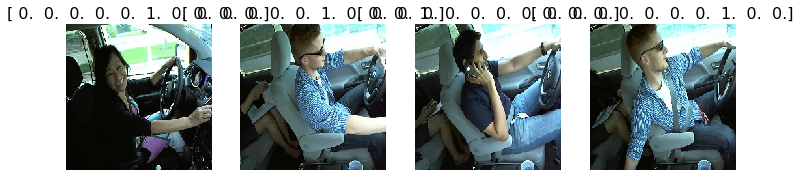

In [45]:
batches = get_batches('train', batch_size=batch_size)
val_batches = get_batches('valid', batch_size=batch_size)
imgs,labels = next(batches)

# This shows the 'ground truth'
plots(imgs, titles=labels)

The VGG model returns 1,000 probabilities for each image, representing the probability that the model assigns to each possible imagenet category for each image. By finding the index with the largest probability (with *np.argmax()*) we can find the predicted label.

In [46]:
def pred_batch(imgs):
    preds = model.predict(imgs)
    idxs = np.argmax(preds, axis=1)
    print ("type(idxs):", type(idxs))

    print('Shape: {}'.format(preds.shape))
    print('First 5 classes: {}'.format(classes[:5]))
    print('First 5 probabilities: {}\n'.format(preds[0, :5]))
    print('Predictions prob/class: ')
    
    for i in range(len(idxs)):
        idx = idxs[i]
        print ('  {:.4f}/{}'.format(preds[i, idx], classes[idx]))
print("method loaded.")

method loaded.


In [47]:
start_time = time.time()
pred_batch(imgs)
print("--- %s seconds to run this block ---" % (time.time() - start_time))

type(idxs): <type 'numpy.ndarray'>
Shape: (4, 1000)
First 5 classes: [u'tench', u'goldfish', u'great_white_shark', u'tiger_shark', u'hammerhead']
First 5 probabilities: [  2.6193e-06   3.2757e-07   2.4186e-04   3.6425e-05   2.4980e-04]

Predictions prob/class: 
  0.3635/seat_belt
  0.8880/seat_belt
  0.8886/seat_belt
  0.2123/seat_belt
--- 3.25995111465 seconds to run this block ---
